In [3]:
import pandas as pd
import json
from os import listdir
from os.path import isfile, join
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.ensemble import IsolationForest
from PIL import Image
from matplotlib.ticker import FuncFormatter
from scipy.spatial import KDTree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import csv
import math

In [2]:

rows = []

with open('all_player_coordinates.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

player_data = []

for row in rows[1:]:  # skip the header row
    x, y, z, player_name = row
    a = [float(x)/195.3125,float(y)/195.3125,float(z)/195.3125]
    player_data.append([player_name] + list(a))

#

df_trajectory = pd.DataFrame(player_data, columns=['Player', 'X', 'Y', 'Z'])

df_trajectory

,Player,X,Y,Z
0,Mr_PsIx0pAt,1684.78096,2622.97376,769.06496
1,Mr_PsIx0pAt,1840.16768,2641.64448,577.09032
2,Mr_PsIx0pAt,2063.71696,2689.33664,339.48888
3,Mr_PsIx0pAt,2201.91184,2755.93632,177.51614
4,Mr_PsIx0pAt,2266.91856,2769.29344,126.88819
...,...,...,...,...
203466,Luchari,973.75184,2321.50080,702.95344
203467,Luchari,890.59792,2534.75936,463.64952
203468,Luchari,805.73896,2753.64288,228.87010
203469,Luchari,766.17560,2865.87840,122.33683


In [11]:
train_size = 0.70
validation_size = 0.15
test_size = 0.15
rows = []
def combine_columns(df):
    new_df = df.copy()
    new_df['XY'] = list(zip(new_df['X'], new_df['Y']))
    new_df = new_df[['XY', 'Z']]
    return new_df


with open('all_player_coordinates_landing_test.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

player_data = []

for row in rows[1:]:  # skip the header row
    x, y, z, player_name = row
    a = [float(x)/195.3125,float(y)/195.3125,float(z)/195.3125]
    player_data.append([player_name]+list(a))  
df = pd.DataFrame(player_data, columns=['Player', 'X', 'Y', 'Z'])

df_train, df_temp = train_test_split(df, train_size=train_size, random_state=42)
validation_size_adjusted = validation_size / (validation_size + test_size)
df_validation, df_test = train_test_split(df_temp, train_size=validation_size_adjusted, random_state=42)

df_train = combine_columns(df_train)
df_validation = combine_columns(df_validation)
df_test = combine_columns(df_test)

df_train, df_validation, df_test

(                              XY           Z
 75182   (1922.93888, 2233.43488)   28.713990
 103777     (2439.264, 2964.7904)  109.696410
 95904       (1002.13, 3347.9936)   17.939847
 73856   (2301.61984, 2853.80128)  109.401250
 42173    (1924.5368, 2221.17904)   28.713673
 ...                          ...         ...
 76820   (2495.34672, 1817.70096)   62.809090
 110268   (2252.41984, 1417.2072)   25.793723
 103694  (1664.80528, 1792.34128)   70.532930
 860     (2445.31776, 1827.59744)   48.821275
 15795   (1289.82056, 2695.09792)   74.805760
 
 [82682 rows x 2 columns],
                               XY           Z
 117608   (1933.16736, 1503.5952)   40.270055
 37978    (883.36592, 1033.41864)  127.385440
 22321   (2573.15424, 2168.08176)   45.961100
 5726    (1726.22816, 1419.46864)   65.396935
 27581     (2078.01424, 1965.064)  100.911730
 ...                          ...         ...
 10540   (2271.27088, 1008.25448)   38.631395
 110871  (2584.05104, 1918.64928)   50.223745
 1155

In [27]:

# Load the image using PIL
img = Image.open("C:/Users/robuc/Desktop/projeto/novoo/roads.png")
# Convert the image to grayscale (though it should already be in black and white)
img_gray = img.convert("L")

# Convert the grayscale image to a numpy array
img_array = np.array(img_gray)

# Get the shape of the array to understand the dimensions of the image
shape = img_array.shape
shape

# Initialize a list to hold the coordinates
coordinates = []

# Iterate over the array and store the coordinates of the white and black pixels
for y in range(shape[0]):  # Loop over rows
    for x in range(shape[1]):  # Loop over columns
        color_value = img_array[y, x]
        if color_value == 255 or color_value == 0:  # Check if the pixel is white or black
            coordinates.append((x, y, color_value))

# Convert the list of coordinates to a numpy array for efficient storage
coordinates_array = np.array(coordinates)

In [28]:

# Load the image using PIL
img = Image.open("C:/Users/robuc/Desktop/projeto/novoo/buildings.png")
# Convert the image to grayscale (though it should already be in black and white)
img_gray = img.convert("L")

# Convert the grayscale image to a numpy array
img_array = np.array(img_gray)

# Get the shape of the array to understand the dimensions of the image
shape = img_array.shape
shape

# Initialize a list to hold the coordinates
coordinates = []

# Iterate over the array and store the coordinates of the white and black pixels
for y in range(shape[0]):  # Loop over rows
    for x in range(shape[1]):  # Loop over columns
        color_value = img_array[y, x]
        if color_value == 255 or color_value == 0:  # Check if the pixel is white or black
            coordinates.append((x, y, color_value))

# Convert the list of coordinates to a numpy array for efficient storage
building_coordinates_array = np.array(coordinates)

In [29]:
building_coordinates_array

road_build = pd.DataFrame()
road_build['Building'] = building_coordinates_array[:,2]
road_build['Roads'] = coordinates_array[:,2]
road_build.corr()

,Building,Roads
Building,1.000000,-0.003463
Roads,-0.003463,1.000000


In [30]:
grid_size = 10
grid_shape = (grid_size, grid_size)
def calculate_nearest_road_distances(coordinates_array,grid_size):
    road_points = coordinates_array[coordinates_array[:, 2] == 255][:, :2]

    # Calculate the number of grids along each axis
    x_grids = y_grids = grid_size

    # The size of each grid square
    grid_square_size = 4096 / grid_size

    # Create a dictionary to store building counts for each grid
    grid_building_counts = {(x, y): 0 for x in range(x_grids) for y in range(y_grids)}
    

    # Count buildings in each grid
    for x, y in road_points:
            grid_x = int(x / grid_square_size)
            grid_y = int(y / grid_square_size)
            grid_building_counts[(grid_x, grid_y)] += 1

    return grid_building_counts




updated = calculate_nearest_road_distances(coordinates_array,grid_size)
model_df = pd.DataFrame.from_dict(updated, orient='index', columns=['Road_Count'])

print(model_df)

        Road_Count
(0, 0)           0
(0, 1)         700
(0, 2)         355
(0, 3)         719
(0, 4)           0
...            ...
(9, 5)           0
(9, 6)           0
(9, 7)           0
(9, 8)           0
(9, 9)           0

[100 rows x 1 columns]


In [31]:
def count_buildings_in_grid(building_coordinates_array, grid_size):

    # Calculate the number of grids along each axis
    x_grids = y_grids = grid_size

    # The size of each grid square
    grid_square_size = 4096 / grid_size

    # Create a dictionary to store building counts for each grid
    grid_building_counts = {(x, y): 0 for x in range(x_grids) for y in range(y_grids)}

    # Count buildings in each grid
    for x, y, value in building_coordinates_array:
        if value == 255:  # Check if the pixel is marked as a building
            grid_x = int(x / grid_square_size)
            grid_y = int(y / grid_square_size)
            grid_building_counts[(grid_x, grid_y)] += 1


    return grid_building_counts


# You would call the function like this:
updated_2 = count_buildings_in_grid(building_coordinates_array, grid_size) 
model_df['Building_Count'] = updated_2
model_df

,Road_Count,Building_Count
"(0, 0)",0,43
"(0, 1)",700,561
"(0, 2)",355,204
"(0, 3)",719,247
"(0, 4)",0,28
...,...,...
"(9, 5)",0,218
"(9, 6)",0,290
"(9, 7)",0,0
"(9, 8)",0,0


In [32]:

def grid_to_center(center, grid_size):
    # Calculate the number of grids along each axis
    x_grids = y_grids = grid_size

    # The size of each grid square
    grid_square_size = 4096 / grid_size

    # Create a dictionary to store player counts for each grid
    grid = {(x, y): 0 for x in range(x_grids) for y in range(y_grids)}

    # Count players in each grid
    for x in range(x_grids):
        for y in range(y_grids):
            grid_center_x = (x * grid_square_size) + (grid_square_size / 2)
            grid_center_y = (y * grid_square_size) + (grid_square_size / 2)
            distance = math.sqrt((grid_center_x - center[0])**2 + (grid_center_y - center[1])**2)
            grid[(x, y)] = distance

    return grid

updated_4=grid_to_center([2043,2043],grid_size)
model_df['Grid_Distance'] = updated_4
model_df

,Road_Count,Building_Count,Grid_Distance
"(0, 0)",0,43,2599.607370
"(0, 1)",700,561,2328.062972
"(0, 2)",355,204,2101.746950
"(0, 3)",719,247,1936.581421
"(0, 4)",0,28,1849.026576
...,...,...,...
"(9, 5)",0,218,1860.069698
"(9, 6)",0,290,1949.230515
"(9, 7)",0,0,2115.344946
"(9, 8)",0,0,2342.095899


In [144]:
def count_players_in_grid(player_coordinates_array, grid_size):
    # Calculate the number of grids along each axis
    x_grids = y_grids = grid_size

    # The size of each grid square
    grid_square_size = 4096 / grid_size

    # Create a dictionary to store player counts for each grid
    grid_player_counts = {(x, y): 0 for x in range(x_grids) for y in range(y_grids)}

    # Count players in each grid
    for x, y in player_coordinates_array:
        grid_x = min(int(x / grid_square_size), grid_size - 1)
        grid_y = min(int(y / grid_square_size), grid_size - 1)
        grid_player_counts[(grid_x, grid_y)] += 1

    return grid_player_counts

train_df = model_df.copy()
validation_df = train_df.copy()
test_df = train_df.copy()




updated_3=count_players_in_grid(df_train['XY'],grid_size)
train_df['Player_Count'] = updated_3

val_4=count_players_in_grid(df_validation['XY'],grid_size)
validation_df['Player_Count'] = val_4

test_4=count_players_in_grid(df_validation['XY'],grid_size)
test_df['Player_Count'] = test_4

train_df,validation_df,test_df

(        Road_Count  Building_Count  Grid_Distance  Player_Count
 (0, 0)           0              43    2599.607370             3
 (0, 1)         700             561    2328.062972            32
 (0, 2)         355             204    2101.746950           179
 (0, 3)         719             247    1936.581421            60
 (0, 4)           0              28    1849.026576            33
 ...            ...             ...            ...           ...
 (9, 5)           0             218    1860.069698            34
 (9, 6)           0             290    1949.230515            30
 (9, 7)           0               0    2115.344946             0
 (9, 8)           0               0    2342.095899             0
 (9, 9)           0               0    2613.749506             0
 
 [100 rows x 4 columns],
         Road_Count  Building_Count  Grid_Distance  Player_Count
 (0, 0)           0              43    2599.607370             0
 (0, 1)         700             561    2328.062972             

In [145]:
n=test_df['Player_Count'].max()
playerrr_count = train_df['Player_Count']


train_df = train_df.div(train_df.max())
validation_df = validation_df.div(validation_df.max())
test_df = test_df.div(test_df.max())

train_df

,Road_Count,Building_Count,Grid_Distance,Player_Count
"(0, 0)",0.000000,0.013284,0.994589,0.000288
"(0, 1)",0.253899,0.173309,0.890699,0.003074
"(0, 2)",0.128763,0.063021,0.804112,0.017195
"(0, 3)",0.260791,0.076305,0.740921,0.005764
"(0, 4)",0.000000,0.008650,0.707423,0.003170
...,...,...,...,...
"(9, 5)",0.000000,0.067346,0.711648,0.003266
"(9, 6)",0.000000,0.089589,0.745760,0.002882
"(9, 7)",0.000000,0.000000,0.809314,0.000000
"(9, 8)",0.000000,0.000000,0.896067,0.000000


In [146]:
# Define the bins and labels for categorization
bins = [i/10 for i in range(0, 11)]  # Creating bins from 0.0 to 1.0 at intervals of 0.1
labels = range(0, 10)  # Labels from 0 to 9 representing each 10% interval


train_df['Player_Category'] = pd.cut(train_df['Player_Count'], bins=bins, labels=labels, include_lowest=True)
train_df = train_df.drop('Player_Count', axis=1)


validation_df['Player_Category'] = pd.cut(validation_df['Player_Count'], bins=bins, labels=labels, include_lowest=True)
validation_df = validation_df.drop('Player_Count', axis=1)

# Categorize the Player_Count column
test_df['Player_Category'] = pd.cut(test_df['Player_Count'], bins=bins, labels=labels, include_lowest=True)
test_df = test_df.drop('Player_Count', axis=1)

In [147]:
train_df

,Road_Count,Building_Count,Grid_Distance,Player_Category
"(0, 0)",0.000000,0.013284,0.994589,0
"(0, 1)",0.253899,0.173309,0.890699,0
"(0, 2)",0.128763,0.063021,0.804112,0
"(0, 3)",0.260791,0.076305,0.740921,0
"(0, 4)",0.000000,0.008650,0.707423,0
...,...,...,...,...
"(9, 5)",0.000000,0.067346,0.711648,0
"(9, 6)",0.000000,0.089589,0.745760,0
"(9, 7)",0.000000,0.000000,0.809314,0
"(9, 8)",0.000000,0.000000,0.896067,0


In [148]:
train_df.corr()#10

,Road_Count,Building_Count,Grid_Distance,Player_Category
Road_Count,1.000000,0.377503,-0.282380,0.089738
Building_Count,0.377503,1.000000,-0.533450,0.516872
Grid_Distance,-0.282380,-0.533450,1.000000,-0.517635
Player_Category,0.089738,0.516872,-0.517635,1.000000


Mean Squared Error: 1.38
R-squared: 0.2618741976893454
Total number of errors:  46 in 100
Accuracy:  54.0


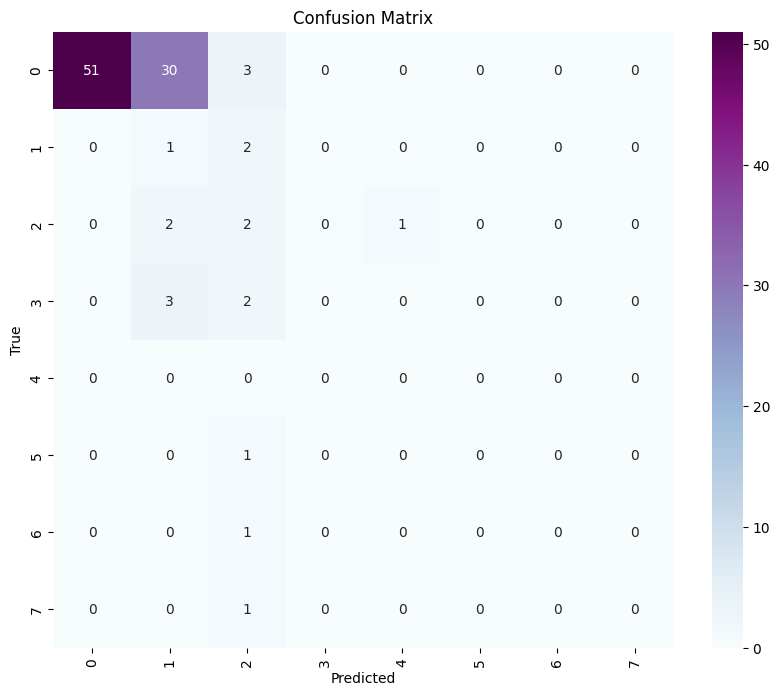

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.metrics import confusion_matrix


X_train = train_df[['Road_Count', 'Building_Count', 'Grid_Distance']]
y_train = train_df['Player_Category']

X_val = validation_df[['Road_Count', 'Building_Count', 'Grid_Distance']]
y_val = validation_df['Player_Category']

X_test = test_df[['Road_Count', 'Building_Count', 'Grid_Distance']]
y_test = test_df['Player_Category']



# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting Player_Count
y_pred = np.round(np.abs(model.predict(X_test)),0)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


cm = confusion_matrix(y_test, y_pred)

print('Total number of errors: ', np.sum(y_test != y_pred),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == y_pred) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()


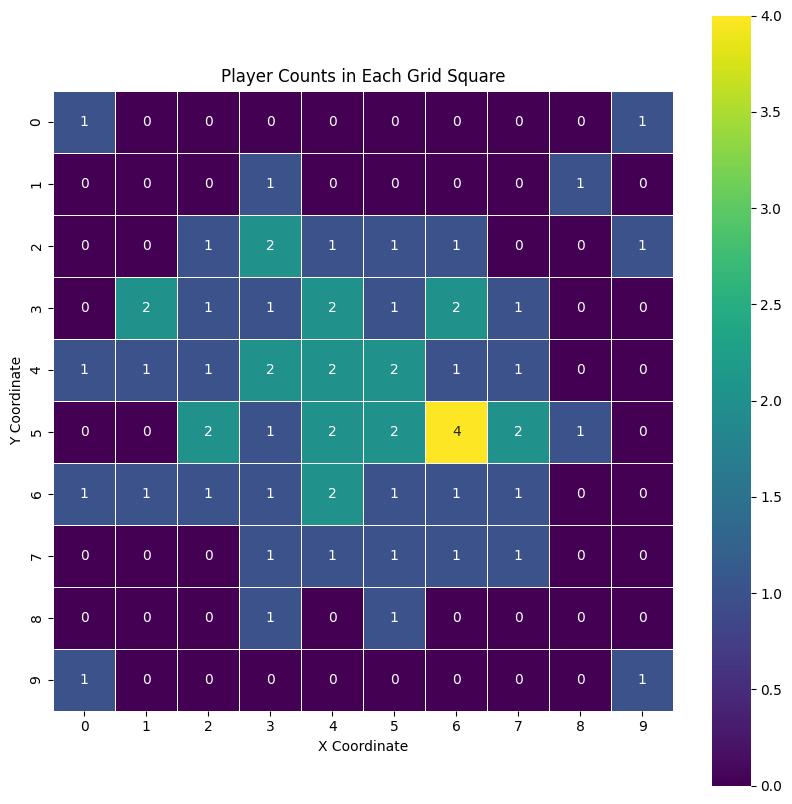

In [150]:
plt.figure(figsize=(10, 10))
sns.heatmap(y_pred.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 2.
 1. 2. 0. 0. 0. 0. 0. 1. 0. 0. 3. 0. 4. 0. 0. 0. 0. 0. 0. 5. 3. 7. 0. 0.
 0. 0. 0. 0. 2. 3. 1. 1. 3. 2. 0. 0. 0. 0. 0. 0. 3. 0. 2. 0. 0. 0. 0. 0.
 0. 2. 0. 3. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Random Forest MSE: 0.17
Mean Squared Error: 0.17
R-squared: 0.909071459135644
Total number of errors:  14 in 100
Accuracy:  86.0


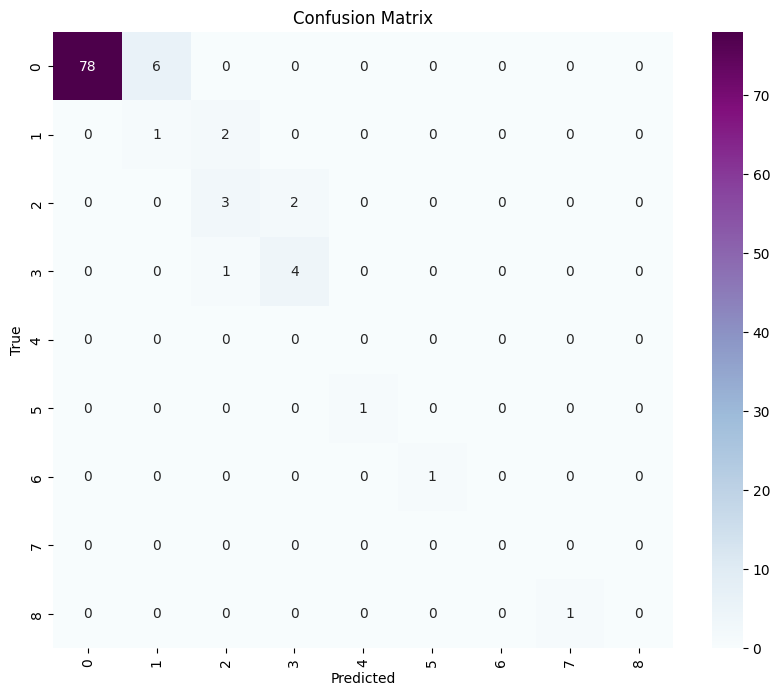

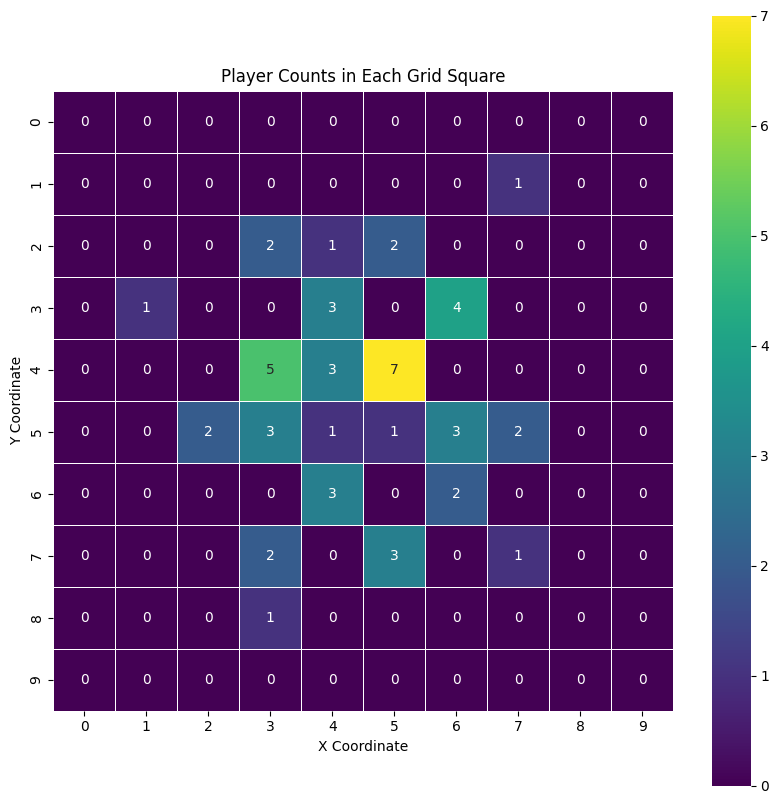

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = np.round(np.abs(rf_model.predict(X_test)),0)
print(rf_predictions)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest MSE:", rf_mse)
r2 = r2_score(y_test, rf_predictions)

print("Mean Squared Error:", rf_mse)
print("R-squared:", r2)


cm = confusion_matrix(y_test, rf_predictions)

print('Total number of errors: ', np.sum(y_test != rf_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == rf_predictions) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(rf_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

KNN MSE: 0.84
R-squared: 0.5507060333761232
Total number of errors:  23 in 100
Accuracy:  77.0


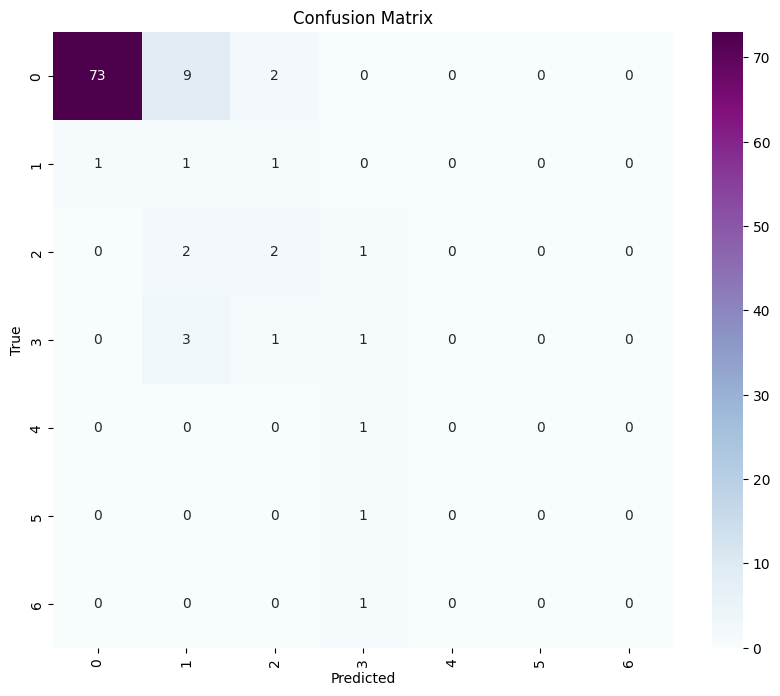

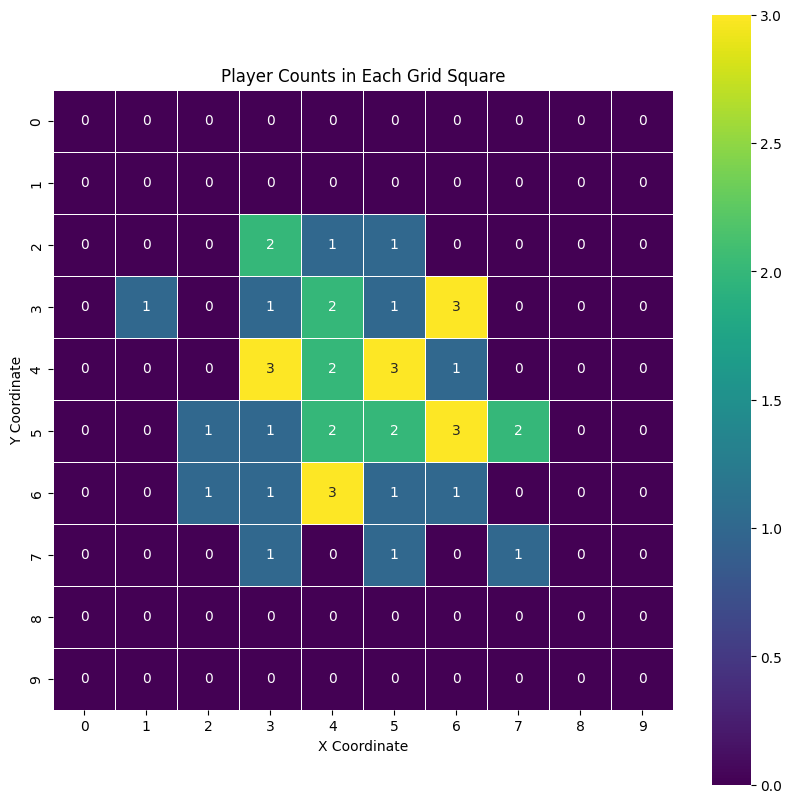

In [152]:
from sklearn.neighbors import KNeighborsRegressor

# KNN model
knn_model = KNeighborsRegressor(n_neighbors=11)
knn_model.fit(X_train, y_train)
knn_predictions = np.round(np.abs(knn_model.predict(X_test)),0)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_predictions)
print("KNN MSE:", knn_mse)

r2 = r2_score(y_test, knn_predictions)
print("R-squared:", r2)


cm = confusion_matrix(y_test, knn_predictions)

print('Total number of errors: ', np.sum(y_test != knn_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == knn_predictions) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 10))
sns.heatmap(knn_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


SVM MSE: 1.06
R-squared: 0.4330338040222508
Total number of errors:  18 in 100
Accuracy:  82.0


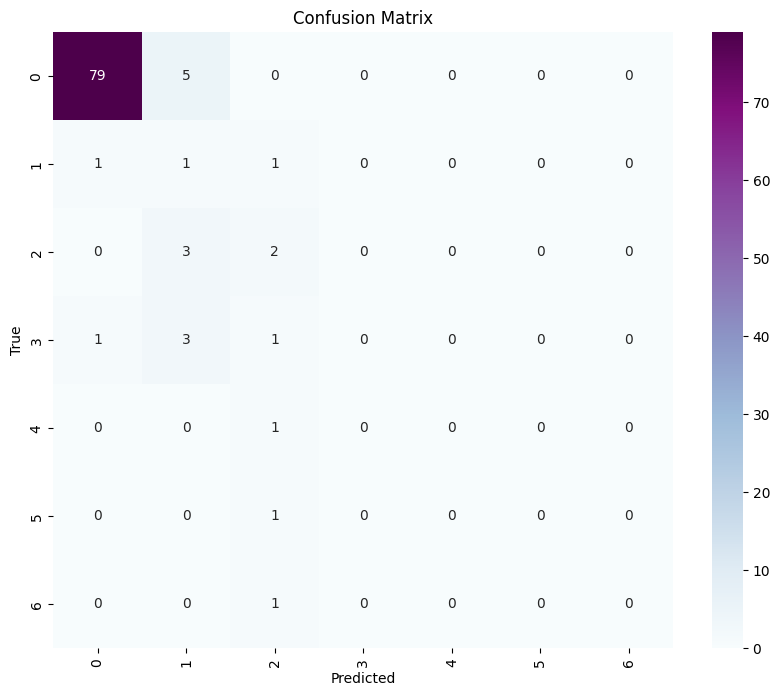

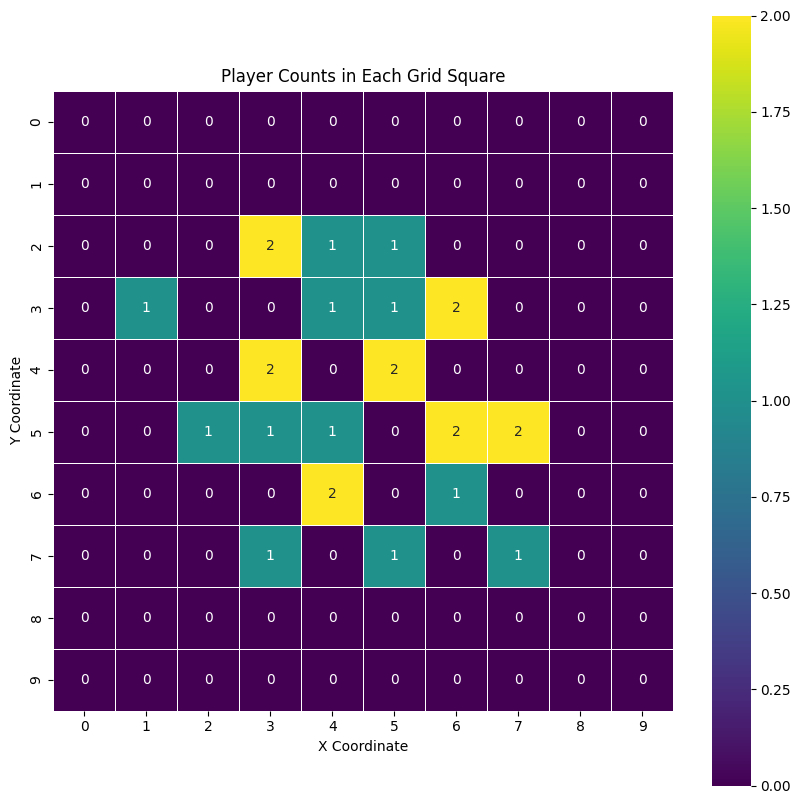

In [153]:
from sklearn.svm import SVR

# SVM model
svm_model = SVR(kernel='rbf')  # 'rbf' is the Radial Basis Function kernel
svm_model.fit(X_train, y_train)
svm_predictions = np.round(np.abs(svm_model.predict(X_test)),0)

# Evaluate the model
svm_mse = mean_squared_error(y_test, svm_predictions)
print("SVM MSE:", svm_mse)

r2 = r2_score(y_test, svm_predictions)
print("R-squared:", r2)


cm = confusion_matrix(y_test, svm_predictions)

print('Total number of errors: ', np.sum(y_test != svm_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == svm_predictions) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()



plt.figure(figsize=(10, 10))
sns.heatmap(svm_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


# Comparassion best model with test

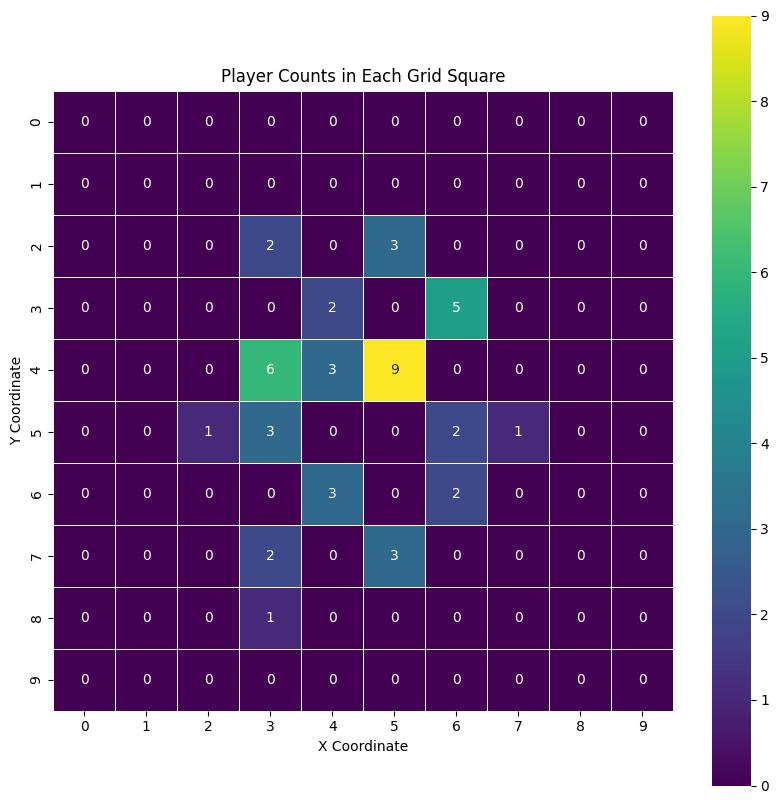

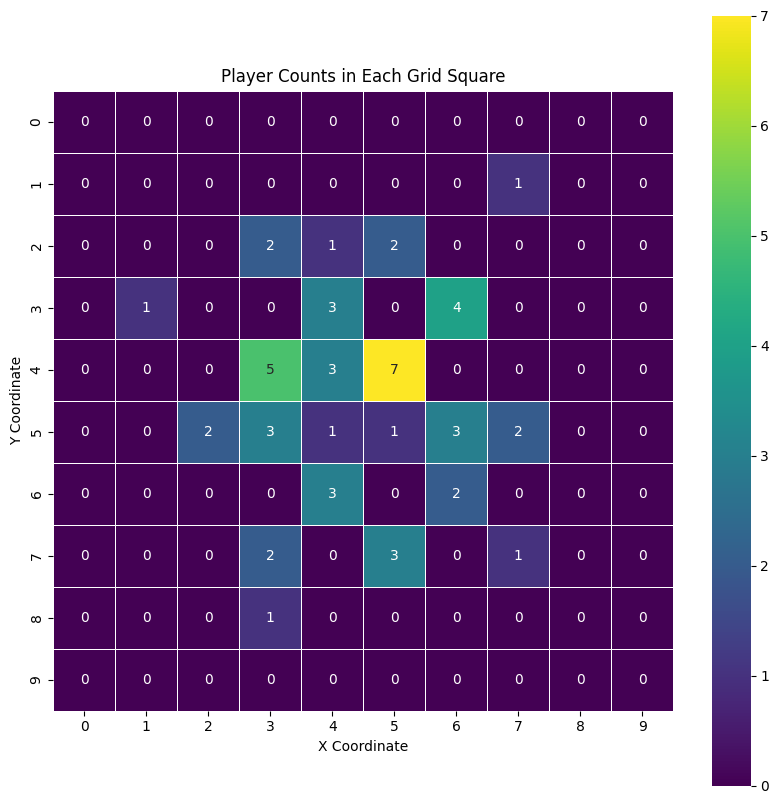

In [154]:
grid_data = np.zeros((10, 10))
grid_shape = (grid_size, grid_size) 
a = np.array(test_df['Player_Category'])
plt.figure(figsize=(10, 10))
sns.heatmap(a.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()





plt.figure(figsize=(10, 10))
sns.heatmap(rf_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural Network model
nn_model = Sequential()
nn_model.add(Dense(100, input_dim=3, activation='relu'))  # 100 neurons in the hidden layer
nn_model.add(Dense(10, input_dim=3, activation='relu'))  # 10 neurons in the hidden layer
nn_model.add(Dense(1, activation='linear'))  # Output layer
nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(X_train, y_train, epochs=200, batch_size=10)




Epoch 1/1000
10/10 [==============================] - 1s 12ms/step - loss: 2.1640
Epoch 2/1000
10/10 [==============================] - 0s 12ms/step - loss: 2.0625
Epoch 3/1000
10/10 [==============================] - 0s 11ms/step - loss: 1.9877
Epoch 4/1000
10/10 [==============================] - 0s 10ms/step - loss: 1.9232
Epoch 5/1000
10/10 [==============================] - 0s 10ms/step - loss: 1.8407
Epoch 6/1000
10/10 [==============================] - 0s 10ms/step - loss: 1.7560
Epoch 7/1000
10/10 [==============================] - 0s 12ms/step - loss: 1.6891
Epoch 8/1000
10/10 [==============================] - 0s 11ms/step - loss: 1.6013
Epoch 9/1000
10/10 [==============================] - 0s 11ms/step - loss: 1.5345
Epoch 10/1000
10/10 [==============================] - 0s 11ms/step - loss: 1.4809
Epoch 11/1000
10/10 [==============================] - 0s 10ms/step - loss: 1.4244
Epoch 12/1000
10/10 [==============================] - 0s 11ms/step - loss: 1.3901
Epoch 13/1000

10/10 [==============================] - 0s 10ms/step - loss: 0.7490
Epoch 100/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.7524
Epoch 101/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.7639
Epoch 102/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.7480
Epoch 103/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.7417
Epoch 104/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.7372
Epoch 105/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.7351
Epoch 106/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.7361
Epoch 107/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.7391
Epoch 108/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.7360
Epoch 109/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.7370
Epoch 110/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.7190
Epoch 1

10/10 [==============================] - 0s 11ms/step - loss: 0.5944
Epoch 197/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.6234
Epoch 198/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.6257
Epoch 199/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5940
Epoch 200/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5973
Epoch 201/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5917
Epoch 202/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.5862
Epoch 203/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5984
Epoch 204/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5919
Epoch 205/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5843
Epoch 206/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5864
Epoch 207/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.5808
Epoch 2

10/10 [==============================] - 0s 12ms/step - loss: 0.5505
Epoch 294/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5384
Epoch 295/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5357
Epoch 296/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.5341
Epoch 297/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.5268
Epoch 298/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5254
Epoch 299/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.5206
Epoch 300/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.5317
Epoch 301/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.5489
Epoch 302/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5228
Epoch 303/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5301
Epoch 304/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.5218
Epoch 3

10/10 [==============================] - 0s 14ms/step - loss: 0.4770
Epoch 391/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.4617
Epoch 392/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4758
Epoch 393/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.4854
Epoch 394/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.4617
Epoch 395/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.4727
Epoch 396/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.4645
Epoch 397/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.4822
Epoch 398/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4706
Epoch 399/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4788
Epoch 400/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.4630
Epoch 401/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.4739
Epoch 4

10/10 [==============================] - 0s 12ms/step - loss: 0.3786
Epoch 488/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3866
Epoch 489/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3759
Epoch 490/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.4150
Epoch 491/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3867
Epoch 492/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3781
Epoch 493/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3770
Epoch 494/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3862
Epoch 495/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3927
Epoch 496/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.3779
Epoch 497/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.3664
Epoch 498/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.3733
Epoch 4

10/10 [==============================] - 0s 13ms/step - loss: 0.3025
Epoch 585/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.2909
Epoch 586/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.2989
Epoch 587/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.2962
Epoch 588/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3226
Epoch 589/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3150
Epoch 590/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.2973
Epoch 591/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3079
Epoch 592/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.2970
Epoch 593/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.2965
Epoch 594/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3070
Epoch 595/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.2862
Epoch 5

10/10 [==============================] - 0s 11ms/step - loss: 0.2450
Epoch 682/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.2499
Epoch 683/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.2288
Epoch 684/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.2483
Epoch 685/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.2296
Epoch 686/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.2286
Epoch 687/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.2330
Epoch 688/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.2399
Epoch 689/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.2392
Epoch 690/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.2244
Epoch 691/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.2241
Epoch 692/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.2212
Epoch 6

10/10 [==============================] - 0s 10ms/step - loss: 0.1580
Epoch 779/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1861
Epoch 780/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1786
Epoch 781/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.1734
Epoch 782/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.1637
Epoch 783/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.1760
Epoch 784/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1725
Epoch 785/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.1675
Epoch 786/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1750
Epoch 787/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.1653
Epoch 788/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.1753
Epoch 789/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1700
Epoch 79

10/10 [==============================] - 0s 10ms/step - loss: 0.1211
Epoch 876/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1250
Epoch 877/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1206
Epoch 878/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1233
Epoch 879/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.1378
Epoch 880/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.1227
Epoch 881/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.1206
Epoch 882/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.1257
Epoch 883/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1224
Epoch 884/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1203
Epoch 885/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.1355
Epoch 886/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1431
Epoch 887

10/10 [==============================] - 0s 11ms/step - loss: 0.0934
Epoch 973/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0956
Epoch 974/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1187
Epoch 975/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0933
Epoch 976/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0949
Epoch 977/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0967
Epoch 978/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1105
Epoch 979/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1170
Epoch 980/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.1093
Epoch 981/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0917
Epoch 982/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1064
Epoch 983/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1016
Epoch 9

4/4 [==============================] - 0s 4ms/step
Neural Network MSE: 0.07
R-squared: 0.962558836114677
Total number of errors:  7 in 100
Accuracy:  93.0


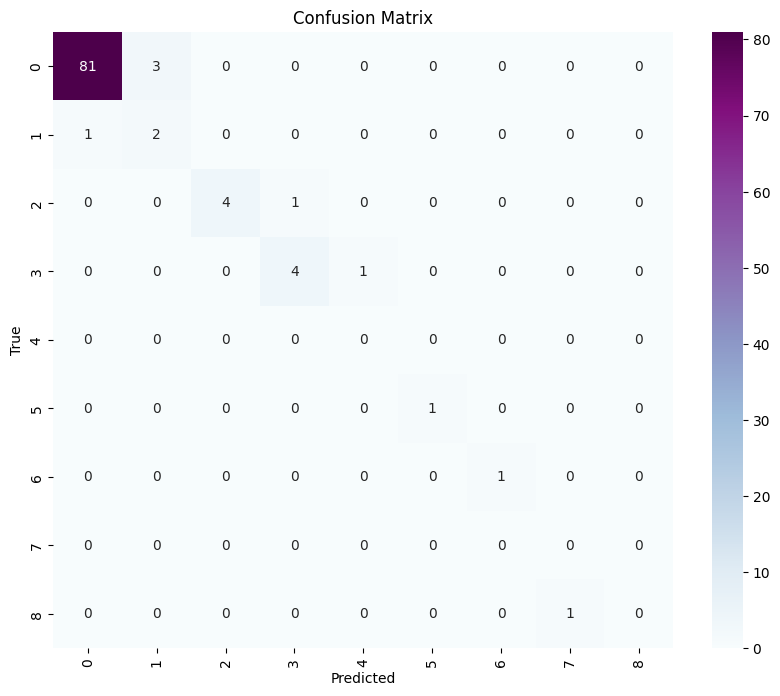

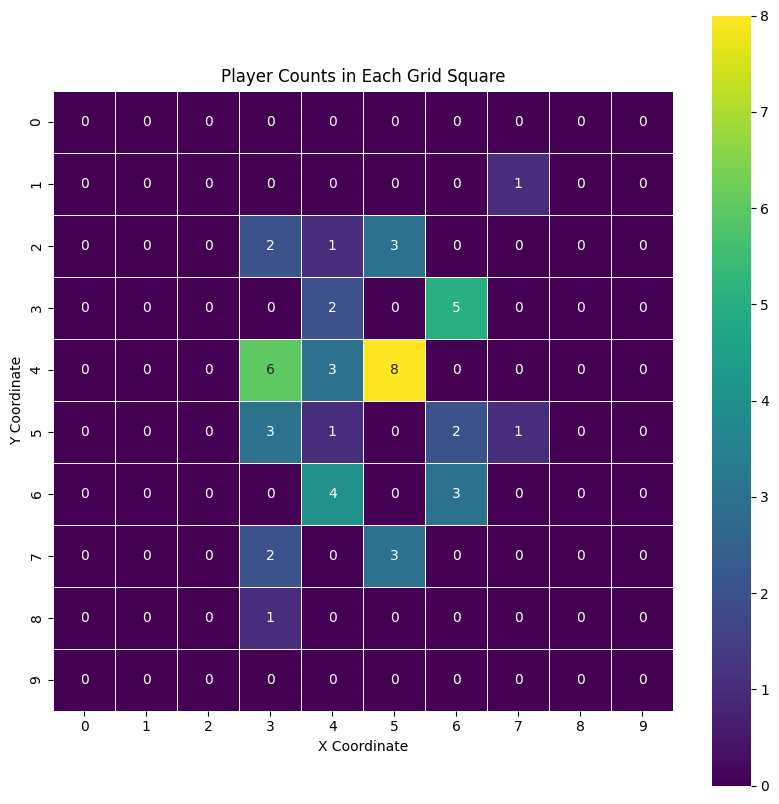

In [54]:
nn_predictions = np.round(np.abs(nn_model.predict(X_test)),0).flatten()
# Evaluate the model
nn_mse = mean_squared_error(y_test, nn_predictions)
print("Neural Network MSE:", nn_mse)


r2 = r2_score(y_test, nn_predictions)
print("R-squared:", r2)


cm = confusion_matrix(y_test, nn_predictions)

print('Total number of errors: ', np.sum(y_test != nn_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == nn_predictions) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()



plt.figure(figsize=(10, 10))
sns.heatmap(nn_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

nn_model = Sequential()
nn_model.add(Dense(1000, input_dim=3, activation='relu'))  # 100 neurons in the hidden layer
nn_model.add(Dropout(0.2))
nn_model.add(Dense(300, activation='relu'))  # 10 neurons in the hidden layer
nn_model.add(Dropout(0.2))  # 10 neurons in the hidden layer
nn_model.add(Dense(100, activation='relu'))  # 10 neurons in the hidden layer
nn_model.add(Dropout(0.2))  # 10 neurons in the hidden layer
nn_model.add(Dense(10, activation='relu'))  # 10 neurons in the hidden layer
nn_model.add(Dense(1, activation='linear'))  # Output layer

nn_model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])





In [158]:
history = nn_model.fit(X_train, y_train, epochs=200, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/200
10/10 [==============================] - 1s 46ms/step - loss: 2.0641 - accuracy: 0.8300 - val_loss: 1.7311 - val_accuracy: 0.6700
Epoch 2/200
10/10 [==============================] - 0s 25ms/step - loss: 1.7447 - accuracy: 0.7500 - val_loss: 1.3892 - val_accuracy: 0.6600
Epoch 3/200
10/10 [==============================] - 0s 25ms/step - loss: 1.3432 - accuracy: 0.7500 - val_loss: 1.0780 - val_accuracy: 0.7100
Epoch 4/200
10/10 [==============================] - 0s 25ms/step - loss: 1.1483 - accuracy: 0.7200 - val_loss: 0.9693 - val_accuracy: 0.8100
Epoch 5/200
10/10 [==============================] - 0s 26ms/step - loss: 1.0505 - accuracy: 0.8000 - val_loss: 1.1470 - val_accuracy: 0.6900
Epoch 6/200
10/10 [==============================] - 0s 27ms/step - loss: 1.3599 - accuracy: 0.7500 - val_loss: 0.9042 - val_accuracy: 0.8000
Epoch 7/200
10/10 [==============================] - 0s 24ms/step - loss: 0.9275 - accuracy: 0.7900 - val_loss: 0.9891 - val_accuracy: 0.7400
Epoch 

10/10 [==============================] - 0s 24ms/step - loss: 0.6135 - accuracy: 0.7900 - val_loss: 0.4745 - val_accuracy: 0.8300
Epoch 59/200
10/10 [==============================] - 0s 24ms/step - loss: 1.1031 - accuracy: 0.8100 - val_loss: 0.4717 - val_accuracy: 0.8300
Epoch 60/200
10/10 [==============================] - 0s 25ms/step - loss: 0.6870 - accuracy: 0.8000 - val_loss: 0.4755 - val_accuracy: 0.8000
Epoch 61/200
10/10 [==============================] - 0s 25ms/step - loss: 0.6535 - accuracy: 0.7900 - val_loss: 0.4820 - val_accuracy: 0.8100
Epoch 62/200
10/10 [==============================] - 0s 25ms/step - loss: 0.4923 - accuracy: 0.8100 - val_loss: 0.4252 - val_accuracy: 0.8000
Epoch 63/200
10/10 [==============================] - 0s 25ms/step - loss: 0.5787 - accuracy: 0.7700 - val_loss: 0.3977 - val_accuracy: 0.8100
Epoch 64/200
10/10 [==============================] - 0s 25ms/step - loss: 0.6106 - accuracy: 0.8200 - val_loss: 0.4530 - val_accuracy: 0.8400
Epoch 65/200

10/10 [==============================] - 0s 24ms/step - loss: 0.3025 - accuracy: 0.8000 - val_loss: 0.2063 - val_accuracy: 0.8400
Epoch 116/200
10/10 [==============================] - 0s 19ms/step - loss: 0.3358 - accuracy: 0.8200 - val_loss: 0.1655 - val_accuracy: 0.8100
Epoch 117/200
10/10 [==============================] - 0s 23ms/step - loss: 0.3341 - accuracy: 0.7900 - val_loss: 0.3279 - val_accuracy: 0.8300
Epoch 118/200
10/10 [==============================] - 0s 21ms/step - loss: 0.4313 - accuracy: 0.8100 - val_loss: 0.1816 - val_accuracy: 0.8100
Epoch 119/200
10/10 [==============================] - 0s 23ms/step - loss: 0.3401 - accuracy: 0.8000 - val_loss: 0.1601 - val_accuracy: 0.8300
Epoch 120/200
10/10 [==============================] - 0s 17ms/step - loss: 0.2489 - accuracy: 0.8100 - val_loss: 0.1553 - val_accuracy: 0.8300
Epoch 121/200
10/10 [==============================] - 0s 16ms/step - loss: 0.3054 - accuracy: 0.7900 - val_loss: 0.1599 - val_accuracy: 0.8100
Epoch 

Epoch 172/200
10/10 [==============================] - 0s 28ms/step - loss: 0.2281 - accuracy: 0.7900 - val_loss: 0.0930 - val_accuracy: 0.8300
Epoch 173/200
10/10 [==============================] - 0s 26ms/step - loss: 0.2715 - accuracy: 0.8300 - val_loss: 0.2449 - val_accuracy: 0.8300
Epoch 174/200
10/10 [==============================] - 0s 28ms/step - loss: 0.1741 - accuracy: 0.8400 - val_loss: 0.1677 - val_accuracy: 0.7800
Epoch 175/200
10/10 [==============================] - 0s 27ms/step - loss: 0.2941 - accuracy: 0.8000 - val_loss: 0.1532 - val_accuracy: 0.8200
Epoch 176/200
10/10 [==============================] - 0s 28ms/step - loss: 0.2421 - accuracy: 0.8000 - val_loss: 0.0770 - val_accuracy: 0.8300
Epoch 177/200
10/10 [==============================] - 0s 24ms/step - loss: 0.2133 - accuracy: 0.8200 - val_loss: 0.0742 - val_accuracy: 0.8200
Epoch 178/200
10/10 [==============================] - 0s 26ms/step - loss: 0.1677 - accuracy: 0.8300 - val_loss: 0.0779 - val_accuracy:

In [ ]:
nn_model.save('nn_model.h5')

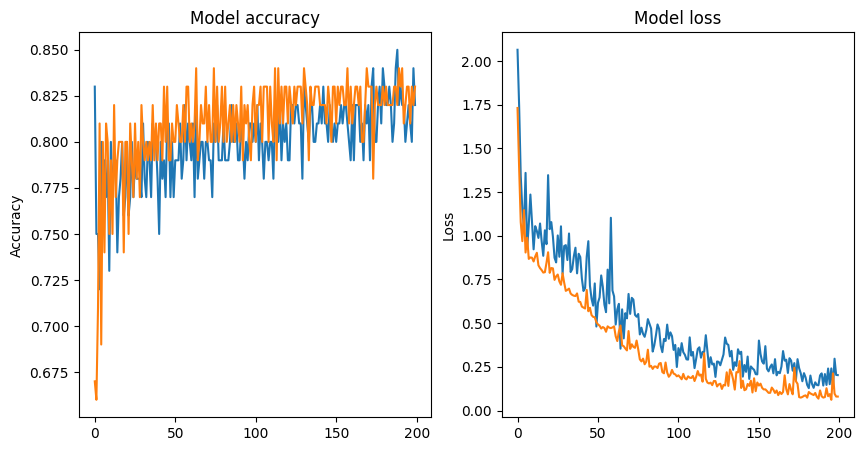

In [159]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.show()


4/4 [==============================] - 0s 3ms/step
Neural Network MSE: 0.1
R-squared: 0.9465126230209671
Total number of errors:  10 in 100
Accuracy:  90.0


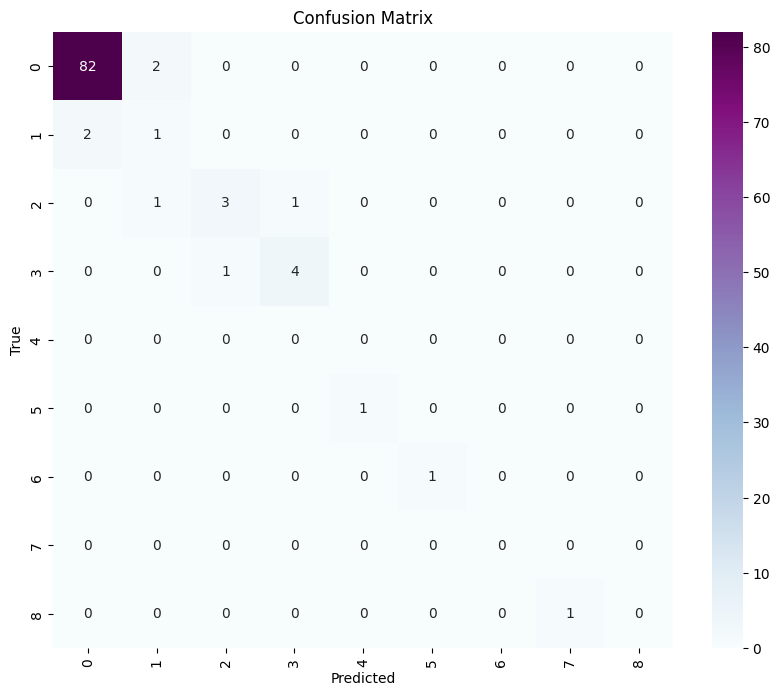

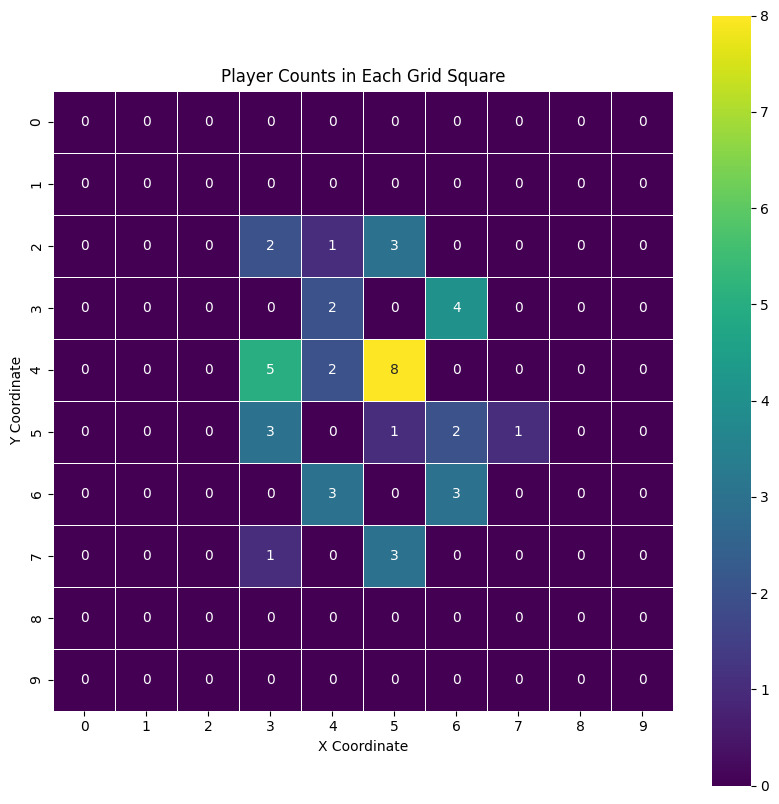

In [160]:
nn_predictions = np.round(np.abs(nn_model.predict(X_test)),0).flatten()
nn_mse = mean_squared_error(y_test, nn_predictions)
print("Neural Network MSE:", nn_mse)
r2 = r2_score(y_test, nn_predictions)
print("R-squared:", r2)
cm = confusion_matrix(y_test, nn_predictions)
print('Total number of errors: ', np.sum(y_test != nn_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == nn_predictions) / len(y_test) * 100)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(10, 10))
sns.heatmap(nn_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [161]:
import tensorflow.keras as keras
nn_model = keras.models.load_model('nn_model_dropout.h5')

4/4 [==============================] - 0s 4ms/step
Neural Network MSE: 0.03
R-squared: 0.9839537869062901
Total number of errors:  3 in 100
Accuracy:  97.0
[[83  1  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0]
 [ 0  0  0  3  2  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1]]


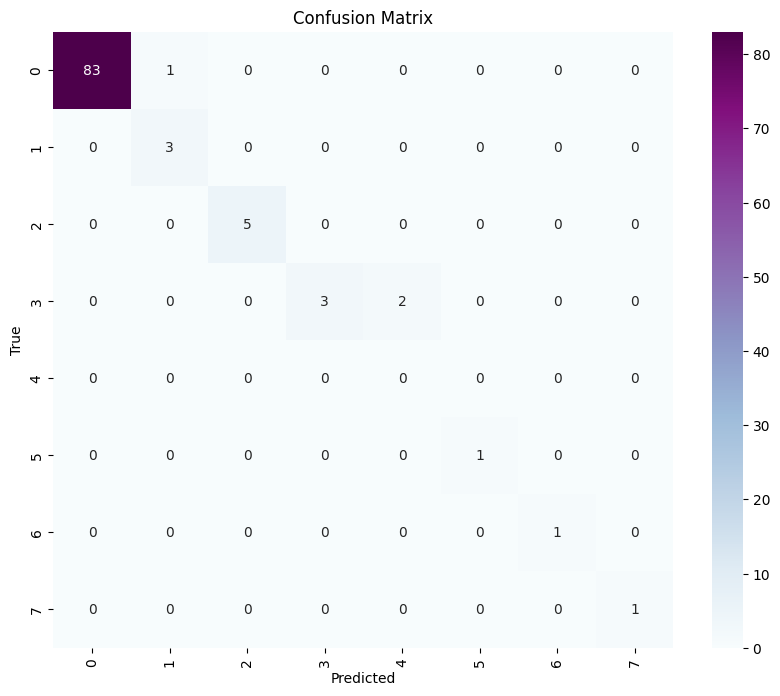

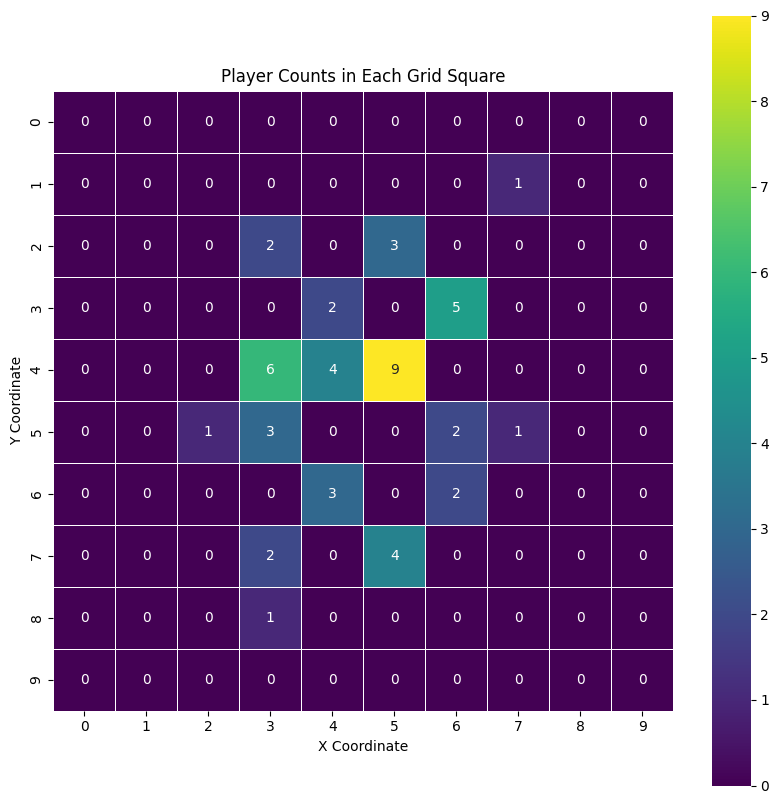

In [164]:
nn_predictions = np.round(np.abs(nn_model.predict(X_test)),0).flatten()
nn_mse = mean_squared_error(y_test, nn_predictions)
print("Neural Network MSE:", nn_mse)
r2 = r2_score(y_test, nn_predictions)
print("R-squared:", r2)
cm = confusion_matrix(y_test, nn_predictions)
print('Total number of errors: ', np.sum(y_test != nn_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == nn_predictions) / len(y_test) * 100)
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(10, 10))
sns.heatmap(nn_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

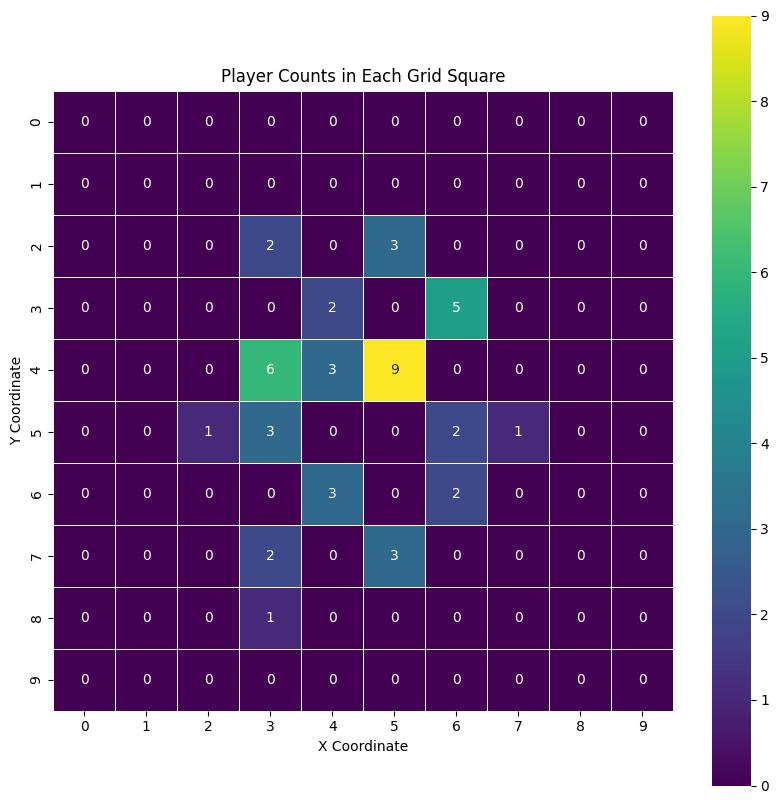

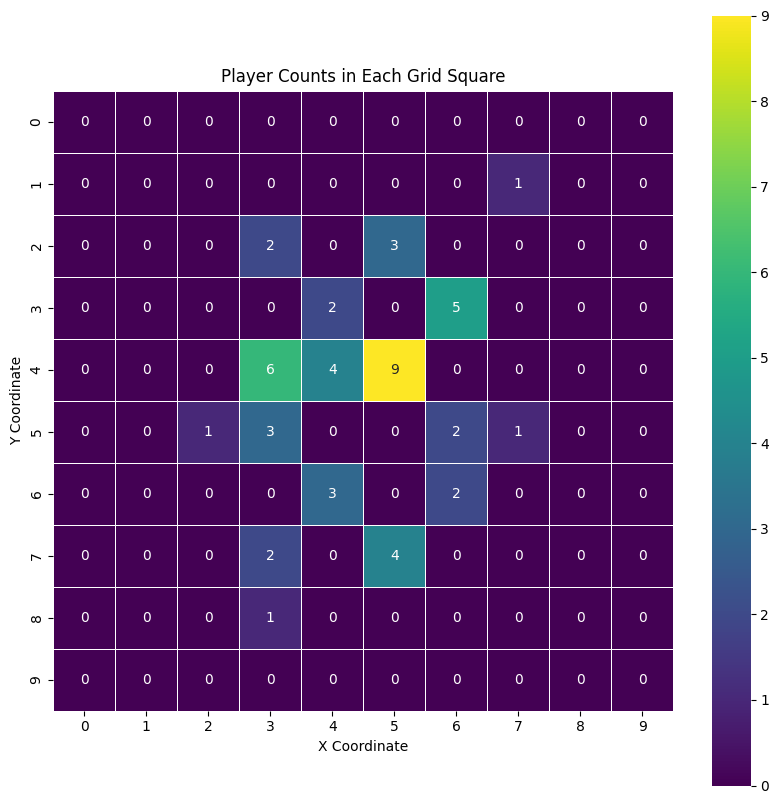

In [163]:
grid_data = np.zeros((10, 10))
grid_shape = (grid_size, grid_size) 
a = np.array(test_df['Player_Category'])
plt.figure(figsize=(10, 10))
sns.heatmap(a.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(nn_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()